In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm

{'K': Parameter containing:
tensor(-0.0050, requires_grad=True)}
Parameter containing:
tensor(-0.0050, requires_grad=True)
rays aperture 0.0
rays aperture 0.7927551
rays aperture 0.8514099


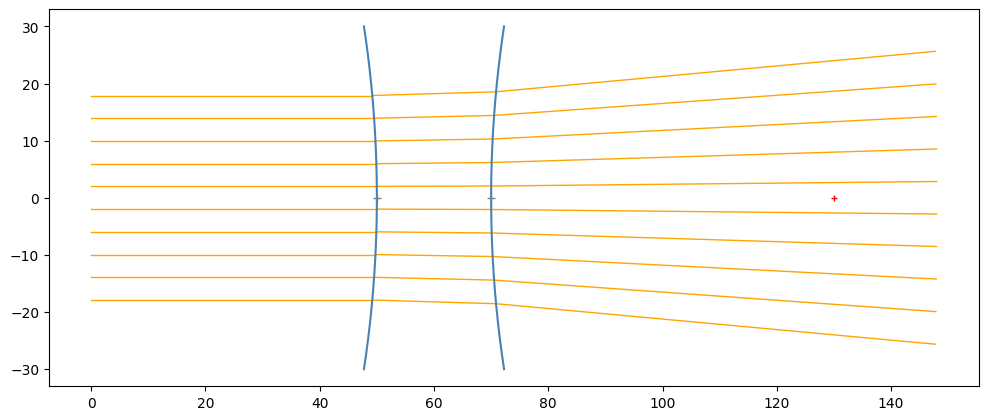

In [2]:
class Optics(tlm.Module):
    def __init__(self):
        super().__init__()

        # lens diameter in mm
        lens_diameter = 60.

        # shape of the lens surface
        self.shape = tlm.CircularArc(lens_diameter, nn.Parameter(torch.tensor(-200.)))

        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.5), inner_thickness=20.)
        
        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=0.6*lens_diameter),
            tlm.Gap(50.),
            
            self.lens,
            
            tlm.Gap(60.0), # focal length
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

print(optics.shape.parameters())
for p in optics.parameters():
    print(p)

tlm.render_plt(optics)

[  0/150] L= 232.984 | grad norm= 23728.984375
[  8/150] L= 85.326 | grad norm= 14076.234375


[ 16/150] L= 14.492 | grad norm= 6010.1796875
[ 24/150] L=  0.256 | grad norm= 610.3478393554688


[ 32/150] L=  4.872 | grad norm= 3854.851318359375
[ 40/150] L=  2.953 | grad norm= 2938.86572265625


[ 48/150] L=  0.261 | grad norm= 620.260986328125
[ 56/150] L=  0.350 | grad norm= 788.4658203125


[ 64/150] L=  0.402 | grad norm= 874.410888671875
[ 72/150] L=  0.154 | grad norm= 273.3724365234375


[ 80/150] L=  0.143 | grad norm= 215.85580444335938
[ 88/150] L=  0.150 | grad norm= 258.2574462890625


[ 96/150] L=  0.128 | grad norm= 54.95490264892578
[104/150] L=  0.130 | grad norm= 83.81605529785156


[112/150] L=  0.129 | grad norm= 68.15403747558594
[120/150] L=  0.127 | grad norm= 3.6035842895507812


[128/150] L=  0.127 | grad norm= 31.776823043823242
[136/150] L=  0.127 | grad norm= 12.071418762207031


[144/150] L=  0.127 | grad norm= 9.108219146728516


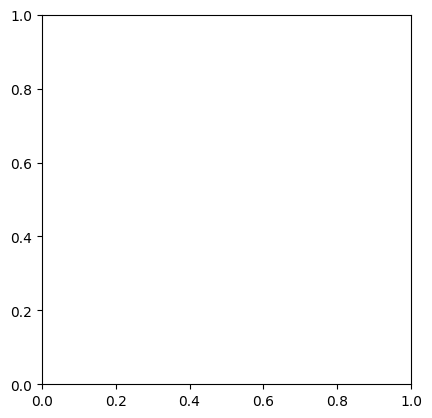

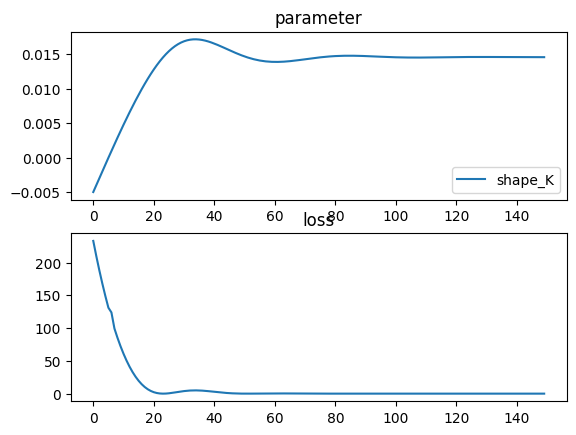

Final arc radius: 68.75245666503906
rays aperture 0.0
rays aperture 2.3422852
rays aperture 1.9876328


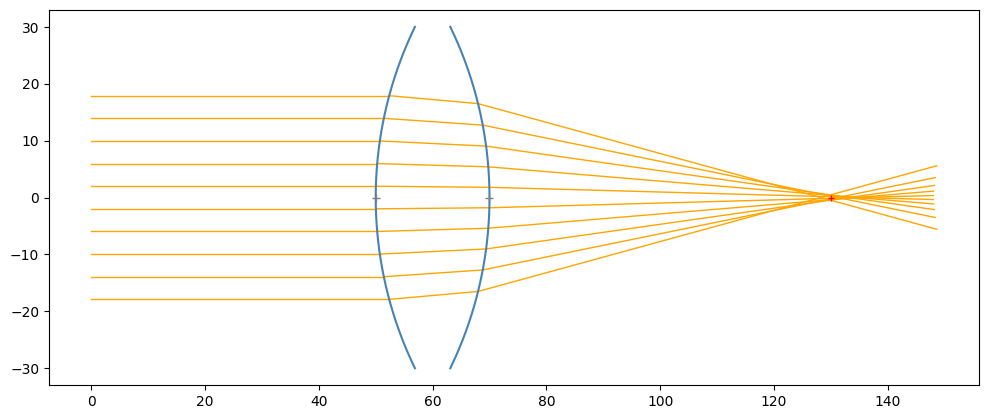

In [3]:
tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 150
)

print("Final arc radius:", optics.shape.coefficients().item())

tlm.render_plt(optics)

In [4]:
part = tlm.lens_to_part(optics.lens)
part

6.890506744384766 29.999996185302734 68.75245666503906
6.890506744384766 29.999996185302734 68.75245666503906


Part at 0x751215466fc0, label(), #children(0)